In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../subscribers.csv', index_col=0)
df.head(3)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True


In [3]:
df1 = pd.read_csv('../channel_spend.csv')
df1

,tier,spend
0,tier1,"{'bing': 300, 'display': 12, 'facebook': 9000,..."
1,tier2,"{'bing': 400, 'display': 13, 'facebook': 10500..."
2,tier3,"{'bing': 900, 'display': 19, 'facebook': 11000..."
3,tier4,"{'bing': 1000, 'display': 20, 'facebook': 1300..."
4,tier5,"{'bing': 1100, 'display': 29, 'facebook': 1400..."
5,tier6,"{'bing': 1300, 'display': 31, 'facebook': 1600..."
6,tier7,"{'bing': 2100, 'display': 94, 'facebook': 1700..."
7,tier8,"{'bing': 3700, 'display': 148, 'facebook': 230..."


In [4]:
df2 = pd.read_csv('..//subid_tier_spend.csv')
df2.head(3)

,subid,tier
0,21724479,3
1,29417030,7
2,29726122,8


In [5]:
df.shape

(227628, 30)

In [6]:
df1.shape

(8, 2)

In [7]:
df2.shape

(97109, 2)

In [8]:
df['monthly_price'].value_counts()

4.7343    227101
5.1013       325
1.0643       167
4.4407        18
4.3673        12
4.0003         2
1.1744         1
0.8074         1
4.6976         1
Name: monthly_price, dtype: int64

In [9]:
df = df.merge(df2, how='outer', on='subid')

In [10]:
df.isnull().sum()

subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                         34904
language                             0
payment_type                    135578
num_trial_days                       0
current_sub_TF                       0
payment_period           

In [11]:
df.shape

(227628, 31)

In [12]:
df.isnull().sum()['tier']/df.shape[0]

0.5733872810023372

We do not have data regarding their tiers for more than half of our members.

I want to reshape the data to be with the following columns: `current_sub_TF`, `attribution_technical`, `attribution_survey`, `tier`

In [13]:
df = df[['current_sub_TF', 'attribution_technical', 'attribution_survey', 'tier']]
df.head(3)

,current_sub_TF,attribution_technical,attribution_survey,tier
0,True,facebook,facebook,3.0
1,True,facebook,facebook,NaN
2,False,organic,facebook,NaN


In [14]:
counts = df.groupby(['current_sub_TF', 'tier']).count()
counts = counts.reset_index()
counts

,current_sub_TF,tier,attribution_technical,attribution_survey
0,False,1.0,10219,10177
1,False,2.0,4109,4083
2,False,3.0,3005,2995
3,False,4.0,7060,7029
4,False,5.0,3876,3857
5,False,6.0,4437,4411
6,False,7.0,5621,5584
7,False,8.0,6549,6508
8,True,1.0,1200,1182
9,True,2.0,4093,4079


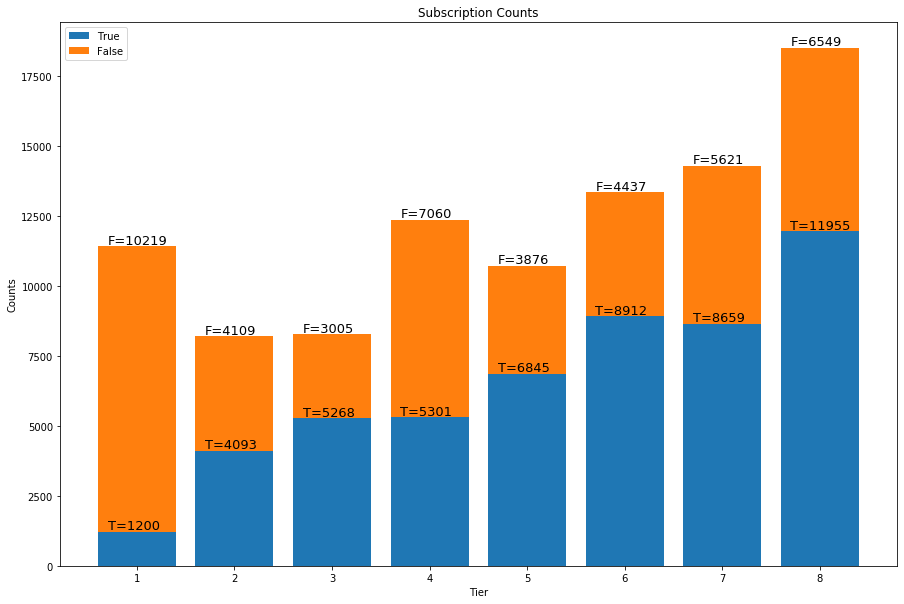

In [78]:
fig, ax = plt.subplots(figsize=(15,10))

tier = np.arange(1,9,1)
sub_T = list(counts[counts['current_sub_TF']==True]['attribution_technical'])
sub_F = list(counts[counts['current_sub_TF']==False]['attribution_technical'])
totals = [i+j for i,j in zip(sub_T, sub_F)]

ax.bar(tier, sub_T, label='True')
ax.bar(tier, sub_F, bottom=sub_T, label='False')

ax.set_xlabel('Tier')
ax.set_ylabel('Counts')
ax.set_title('Subscription Counts')
ax.legend()


# Text on the top of each barplot
width = np.arange(1,len(tier)+1,1)
#true
for i in range(len(tier)):
    plt.text(x = width[i]-0.3,
             y = sub_T[i]+100, 
             s = f'T={sub_T[i]}', size = 13)
    
#false
for i in range(len(tier)):
    plt.text(x = width[i]-0.3,
             y = totals[i]+100, 
             s = f'F={sub_F[i]}', size = 13)

plt.show()
#fig.savefig('plots/sub_counts.png')

In [16]:
df.groupby(['current_sub_TF', 'tier'])['attribution_technical'].value_counts()

current_sub_TF  tier  attribution_technical
False           1.0   facebook                 9084
                      search                   1072
                      display                    40
                      bing                       15
                      youtube                     8
                                               ... 
True            8.0   facebook                 8177
                      search                   2959
                      display                   326
                      youtube                   312
                      bing                      181
Name: attribution_technical, Length: 79, dtype: int64

In [17]:
keys = df.groupby(['current_sub_TF', 'tier'])['attribution_technical'].value_counts().keys()
keys

MultiIndex([(False, 1.0, 'facebook'),
            (False, 1.0,   'search'),
            (False, 1.0,  'display'),
            (False, 1.0,     'bing'),
            (False, 1.0,  'youtube'),
            (False, 2.0, 'facebook'),
            (False, 2.0,   'search'),
            (False, 2.0,     'bing'),
            (False, 2.0,  'display'),
            (False, 2.0,  'youtube'),
            (False, 3.0, 'facebook'),
            (False, 3.0,   'search'),
            (False, 3.0,     'bing'),
            (False, 3.0,  'display'),
            (False, 3.0,  'youtube'),
            (False, 4.0, 'facebook'),
            (False, 4.0,   'search'),
            (False, 4.0,  'display'),
            (False, 4.0,     'bing'),
            (False, 4.0,  'youtube'),
            (False, 5.0, 'facebook'),
            (False, 5.0,   'search'),
            (False, 5.0,     'bing'),
            (False, 5.0,  'display'),
            (False, 5.0,  'youtube'),
            (False, 6.0, 'facebook'),
            

In [18]:
values = list(df.groupby(['current_sub_TF', 'tier'])['attribution_technical'].value_counts())

In [19]:
dict(df.groupby(['current_sub_TF', 'tier'])['attribution_technical'].value_counts())[(False, 1.0, 'facebook')]

9084

In [20]:
attr_dict = dict(df.groupby(['current_sub_TF', 'tier'])['attribution_technical'].value_counts())

In [21]:
current_sub_TFs = [True, False]
tiers = np.arange(1,9,1)
attribution_technicals = list(set(df['attribution_technical']))

In [22]:
attr_dict

{(False, 1.0, 'facebook'): 9084,
 (False, 1.0, 'search'): 1072,
 (False, 1.0, 'display'): 40,
 (False, 1.0, 'bing'): 15,
 (False, 1.0, 'youtube'): 8,
 (False, 2.0, 'facebook'): 3032,
 (False, 2.0, 'search'): 963,
 (False, 2.0, 'bing'): 107,
 (False, 2.0, 'display'): 6,
 (False, 2.0, 'youtube'): 1,
 (False, 3.0, 'facebook'): 2186,
 (False, 3.0, 'search'): 734,
 (False, 3.0, 'bing'): 49,
 (False, 3.0, 'display'): 31,
 (False, 3.0, 'youtube'): 5,
 (False, 4.0, 'facebook'): 6088,
 (False, 4.0, 'search'): 870,
 (False, 4.0, 'display'): 49,
 (False, 4.0, 'bing'): 47,
 (False, 4.0, 'youtube'): 6,
 (False, 5.0, 'facebook'): 3086,
 (False, 5.0, 'search'): 710,
 (False, 5.0, 'bing'): 42,
 (False, 5.0, 'display'): 26,
 (False, 5.0, 'youtube'): 12,
 (False, 6.0, 'facebook'): 3253,
 (False, 6.0, 'search'): 1069,
 (False, 6.0, 'bing'): 48,
 (False, 6.0, 'display'): 47,
 (False, 6.0, 'youtube'): 20,
 (False, 7.0, 'facebook'): 4133,
 (False, 7.0, 'search'): 1211,
 (False, 7.0, 'display'): 152,
 (False

In [23]:
channels = []
for sub_TF, tier, channel in keys:
    channels.append(channel)
channels = set(channels)
channels

{'bing', 'display', 'facebook', 'search', 'youtube'}

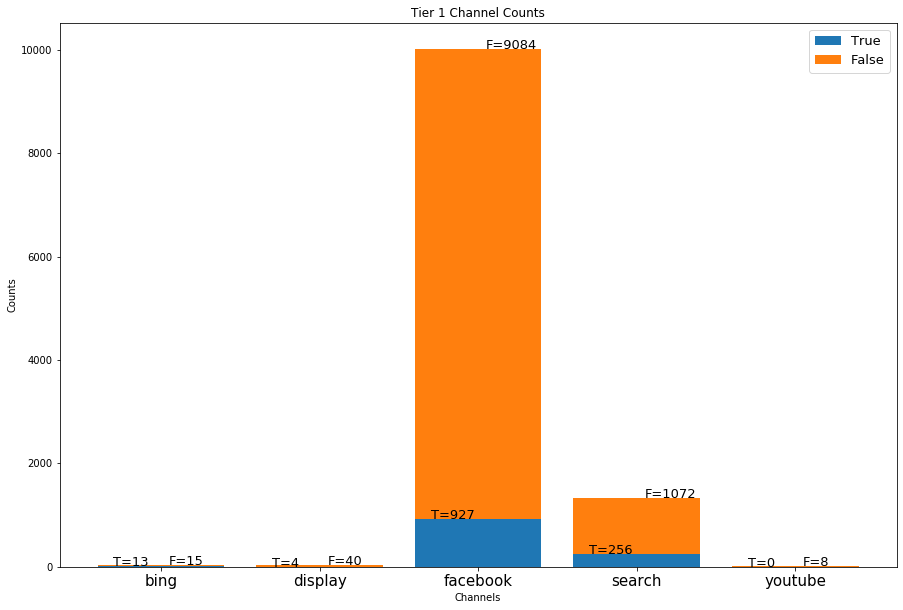

In [24]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 1
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [13, 4, 927, 256, 0]
sub_F = [15, 40, 9084, 1072, 8]
totals = [i+j for i,j in zip(sub_T, sub_F)]

ax.bar(channels, sub_T, label='True')
ax.bar(channels, sub_F, bottom=sub_T, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Counts')
ax.set_title(f'Tier {tier} Channel Counts')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T[i]+0.1, 
             s = f'T={sub_T[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = totals[i], 
             s = f'F={sub_F[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_counts.png')

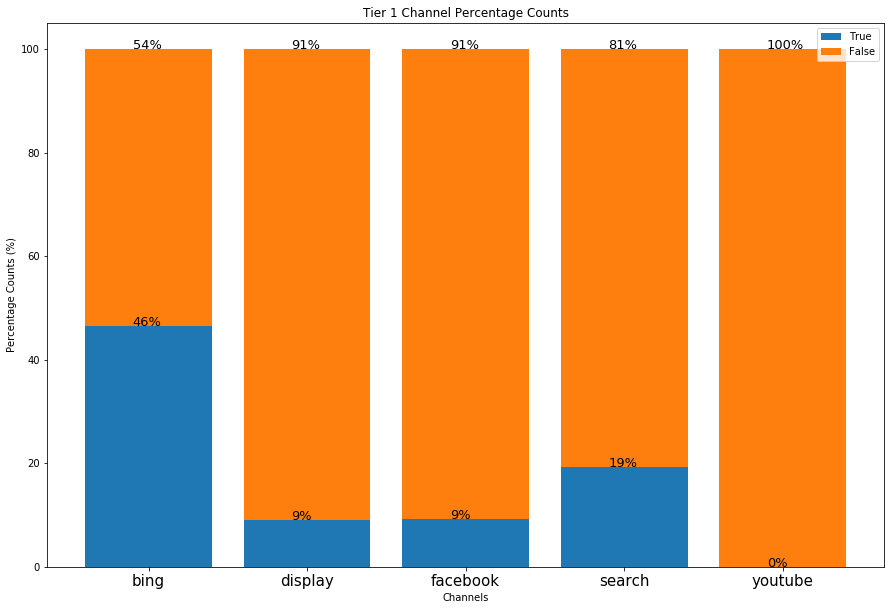

In [25]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 1
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [13, 4, 927, 256, 0]
sub_F = [15, 40, 9084, 1072, 8]
totals = [i+j for i,j in zip(sub_T, sub_F)]

sub_Tp = [i/j for i,j in zip(sub_T,totals)]
sub_Fp = [i/j for i,j in zip(sub_F,totals)]
totalp = [i+j for i,j in zip(sub_Tp, sub_Fp)]

ax.bar(channels, sub_Tp, label='True')
ax.bar(channels, sub_Fp, bottom=sub_Tp, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_yticklabels(np.arange(0,101,20), fontsize=10)
ax.set_xlabel('Channels')
ax.set_ylabel('Percentage Counts (%)')
ax.set_title(f'Tier {tier} Channel Percentage Counts')
ax.legend()

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = sub_Tp[i], 
             s = f'{int(round(sub_Tp[i],2)*100)}%', size = 13)
    
#false
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = totalp[i], 
             s = f'{int(round(sub_Fp[i],2)*100)}%', size = 13)


plt.show()
#fig.savefig(f'plots/tier{tier}_countsp.png')

(False, 2.0, 'facebook'): 3032,
 (False, 2.0, 'search'): 963,
 (False, 2.0, 'bing'): 107,
 (False, 2.0, 'display'): 6,
 (False, 2.0, 'youtube'): 1,
 
 (True, 2.0, 'facebook'): 3097,
 (True, 2.0, 'search'): 976,
 (True, 2.0, 'bing'): 13,
 (True, 2.0, 'display'): 6,
 (True, 2.0, 'youtube'): 1,

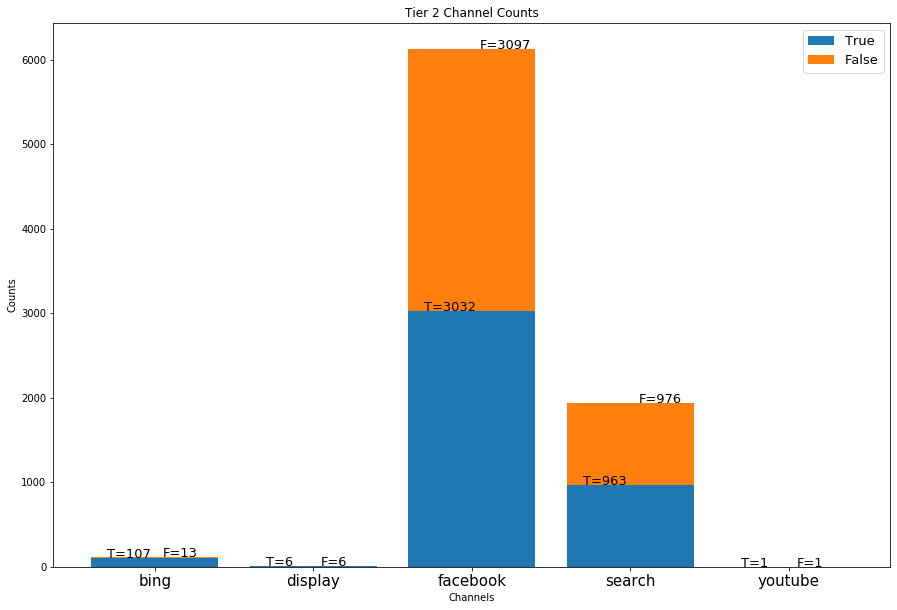

In [26]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 2
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [107, 6, 3032, 963, 1]
sub_F = [13, 6, 3097, 976, 1]
totals = [i+j for i,j in zip(sub_T, sub_F)]

ax.bar(channels, sub_T, label='True')
ax.bar(channels, sub_F, bottom=sub_T, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Counts')
ax.set_title(f'Tier {tier} Channel Counts')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T[i]+0.1, 
             s = f'T={sub_T[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = totals[i], 
             s = f'F={sub_F[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_counts.png')

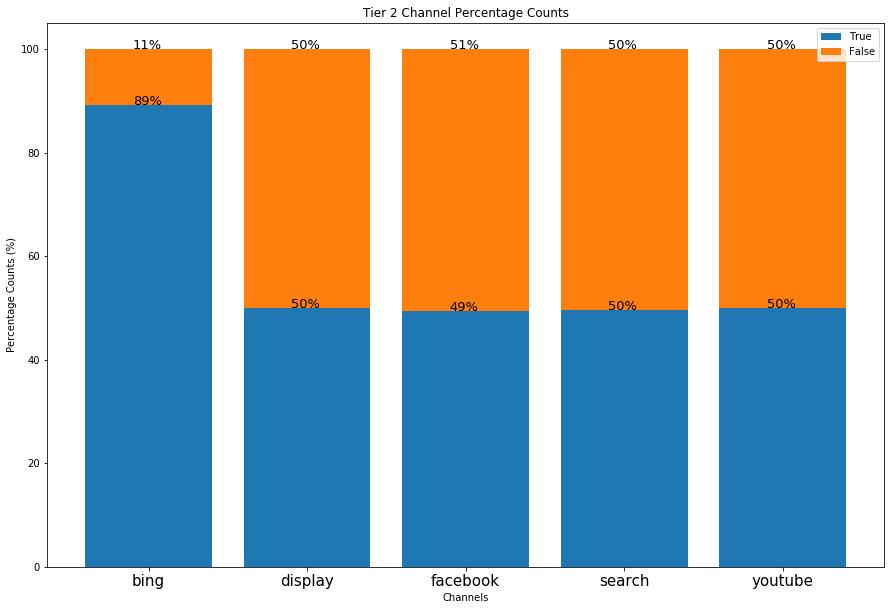

In [27]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 2
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [107, 6, 3032, 963, 1]
sub_F = [13, 6, 3097, 976, 1]
totals = [i+j for i,j in zip(sub_T, sub_F)]

sub_Tp = [i/j for i,j in zip(sub_T,totals)]
sub_Fp = [i/j for i,j in zip(sub_F,totals)]
totalp = [i+j for i,j in zip(sub_Tp, sub_Fp)]

ax.bar(channels, sub_Tp, label='True')
ax.bar(channels, sub_Fp, bottom=sub_Tp, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_yticklabels(np.arange(0,101,20), fontsize=10)
ax.set_xlabel('Channels')
ax.set_ylabel('Percentage Counts (%)')
ax.set_title(f'Tier {tier} Channel Percentage Counts')
ax.legend()

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = sub_Tp[i], 
             s = f'{int(round(sub_Tp[i],2)*100)}%', size = 13)
    
#false
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = totalp[i], 
             s = f'{int(round(sub_Fp[i],2)*100)}%', size = 13)


plt.show()
#fig.savefig(f'plots/tier{tier}_countsp.png')

(False, 3.0, 'facebook'): 2186,
 (False, 3.0, 'search'): 734,
 (False, 3.0, 'bing'): 49,
 (False, 3.0, 'display'): 31,
 (False, 3.0, 'youtube'): 5,
    (True, 3.0, 'facebook'): 4103,
 (True, 3.0, 'search'): 1118,
 (True, 3.0, 'bing'): 22,
 (True, 3.0, 'display'): 19,
 (True, 3.0, 'youtube'): 6,

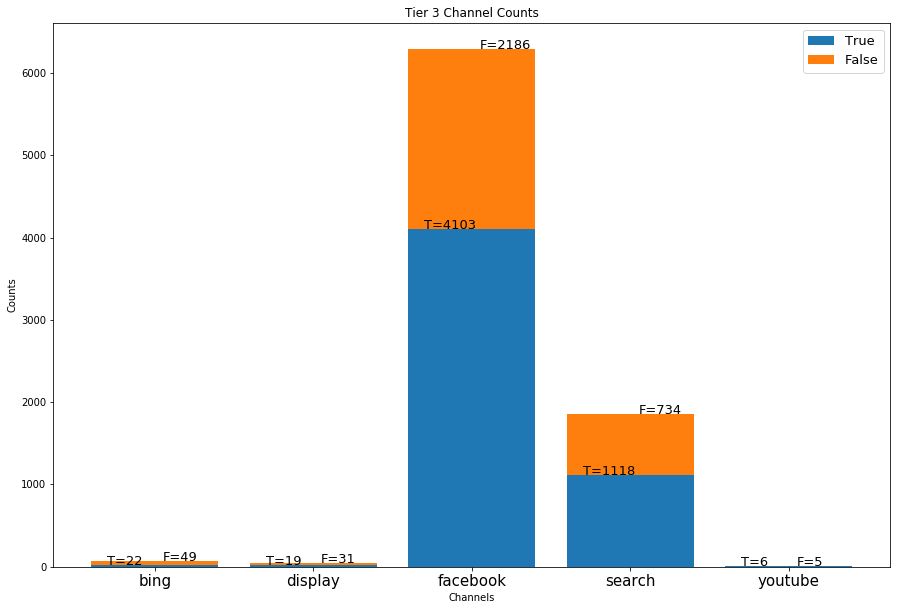

In [28]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 3
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [22, 19, 4103, 1118, 6]
sub_F = [49, 31, 2186, 734, 5]
totals = [i+j for i,j in zip(sub_T, sub_F)]

ax.bar(channels, sub_T, label='True')
ax.bar(channels, sub_F, bottom=sub_T, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Counts')
ax.set_title(f'Tier {tier} Channel Counts')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T[i]+0.1, 
             s = f'T={sub_T[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = totals[i], 
             s = f'F={sub_F[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_counts.png')

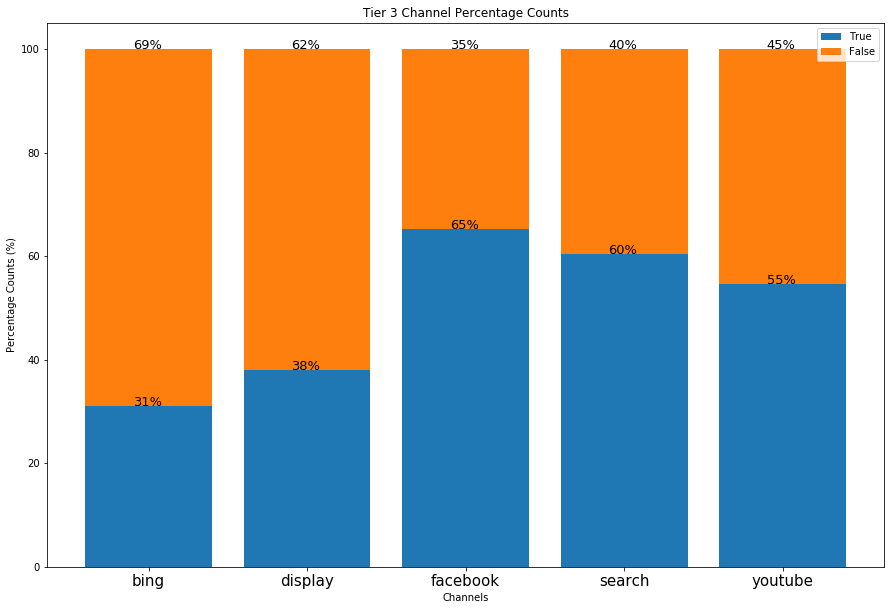

In [29]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 3
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [22, 19, 4103, 1118, 6]
sub_F = [49, 31, 2186, 734, 5]
totals = [i+j for i,j in zip(sub_T, sub_F)]

sub_Tp = [i/j for i,j in zip(sub_T,totals)]
sub_Fp = [i/j for i,j in zip(sub_F,totals)]
totalp = [i+j for i,j in zip(sub_Tp, sub_Fp)]

ax.bar(channels, sub_Tp, label='True')
ax.bar(channels, sub_Fp, bottom=sub_Tp, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_yticklabels(np.arange(0,101,20), fontsize=10)
ax.set_xlabel('Channels')
ax.set_ylabel('Percentage Counts (%)')
ax.set_title(f'Tier {tier} Channel Percentage Counts')
ax.legend()

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = sub_Tp[i], 
             s = f'{int(round(sub_Tp[i],2)*100)}%', size = 13)
    
#false
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = totalp[i], 
             s = f'{int(round(sub_Fp[i],2)*100)}%', size = 13)


plt.show()
#fig.savefig(f'plots/tier{tier}_countsp.png')

(False, 4.0, 'facebook'): 6088,
 (False, 4.0, 'search'): 870,
 (False, 4.0, 'display'): 49,
 (False, 4.0, 'bing'): 47,
 (False, 4.0, 'youtube'): 6,
 (True, 4.0, 'facebook'): 3767,
 (True, 4.0, 'search'): 1463,
 (True, 4.0, 'bing'): 37,
 (True, 4.0, 'display'): 25,
 (True, 4.0, 'youtube'): 9,

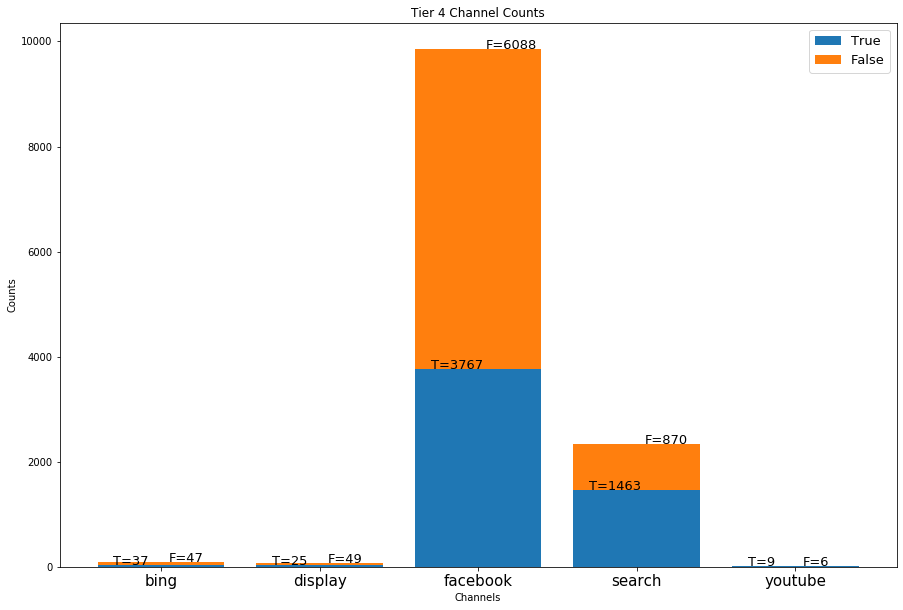

In [30]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 4
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [37, 25, 3767, 1463, 9]
sub_F = [47, 49, 6088, 870, 6]
totals = [i+j for i,j in zip(sub_T, sub_F)]

ax.bar(channels, sub_T, label='True')
ax.bar(channels, sub_F, bottom=sub_T, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Counts')
ax.set_title(f'Tier {tier} Channel Counts')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T[i]+0.1, 
             s = f'T={sub_T[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = totals[i], 
             s = f'F={sub_F[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_counts.png')

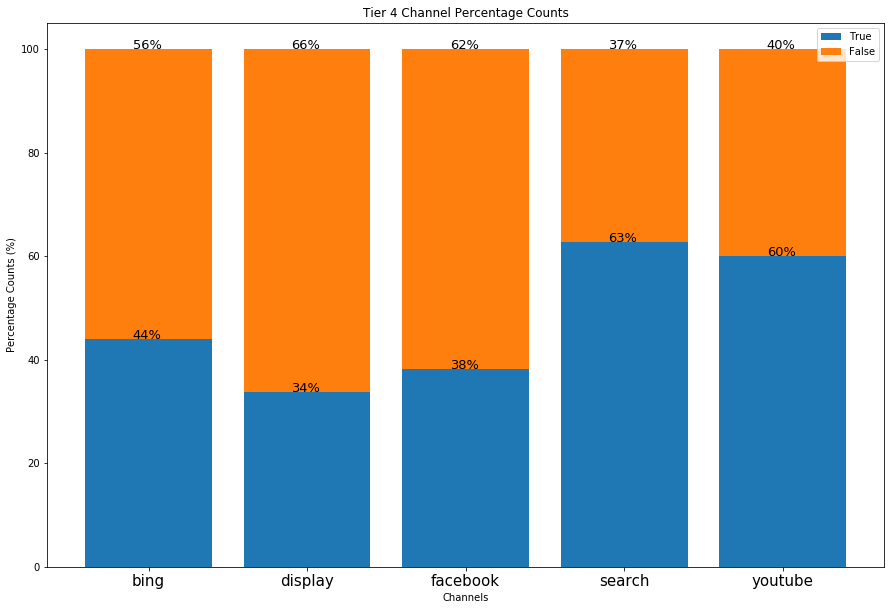

In [31]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 4
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [37, 25, 3767, 1463, 9]
sub_F = [47, 49, 6088, 870, 6]
totals = [i+j for i,j in zip(sub_T, sub_F)]

sub_Tp = [i/j for i,j in zip(sub_T,totals)]
sub_Fp = [i/j for i,j in zip(sub_F,totals)]
totalp = [i+j for i,j in zip(sub_Tp, sub_Fp)]

ax.bar(channels, sub_Tp, label='True')
ax.bar(channels, sub_Fp, bottom=sub_Tp, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_yticklabels(np.arange(0,101,20), fontsize=10)
ax.set_xlabel('Channels')
ax.set_ylabel('Percentage Counts (%)')
ax.set_title(f'Tier {tier} Channel Percentage Counts')
ax.legend()

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = sub_Tp[i], 
             s = f'{int(round(sub_Tp[i],2)*100)}%', size = 13)
    
#false
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = totalp[i], 
             s = f'{int(round(sub_Fp[i],2)*100)}%', size = 13)


plt.show()
#fig.savefig(f'plots/tier{tier}_countsp.png')

(False, 5.0, 'facebook'): 3086,
 (False, 5.0, 'search'): 710,
 (False, 5.0, 'bing'): 42,
 (False, 5.0, 'display'): 26,
 (False, 5.0, 'youtube'): 12,
 (True, 5.0, 'facebook'): 4902,
 (True, 5.0, 'search'): 1800,
 (True, 5.0, 'display'): 64,
 (True, 5.0, 'bing'): 44,
 (True, 5.0, 'youtube'): 35,

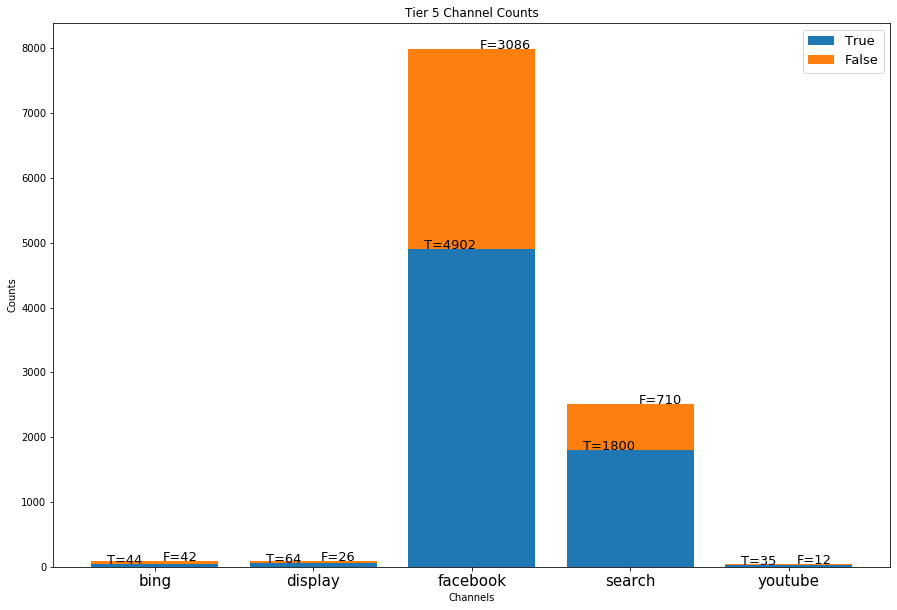

In [32]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 5
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [44, 64, 4902, 1800, 35]
sub_F = [42, 26, 3086, 710, 12]
totals = [i+j for i,j in zip(sub_T, sub_F)]

ax.bar(channels, sub_T, label='True')
ax.bar(channels, sub_F, bottom=sub_T, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Counts')
ax.set_title(f'Tier {tier} Channel Counts')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T[i]+0.1, 
             s = f'T={sub_T[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = totals[i], 
             s = f'F={sub_F[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_counts.png')

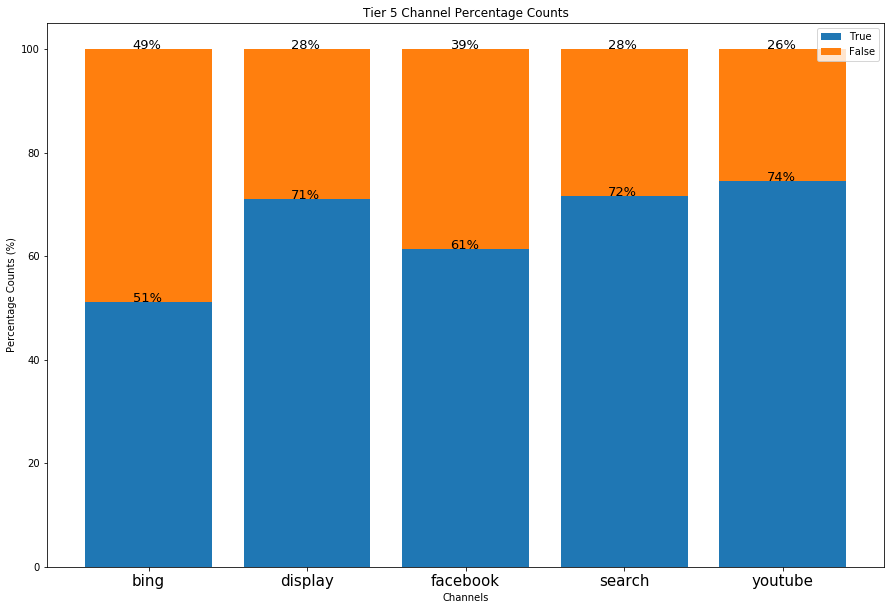

In [33]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 5
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [44, 64, 4902, 1800, 35]
sub_F = [42, 26, 3086, 710, 12]
totals = [i+j for i,j in zip(sub_T, sub_F)]

sub_Tp = [i/j for i,j in zip(sub_T,totals)]
sub_Fp = [i/j for i,j in zip(sub_F,totals)]
totalp = [i+j for i,j in zip(sub_Tp, sub_Fp)]

ax.bar(channels, sub_Tp, label='True')
ax.bar(channels, sub_Fp, bottom=sub_Tp, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_yticklabels(np.arange(0,101,20), fontsize=10)
ax.set_xlabel('Channels')
ax.set_ylabel('Percentage Counts (%)')
ax.set_title(f'Tier {tier} Channel Percentage Counts')
ax.legend()

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = sub_Tp[i], 
             s = f'{int(round(sub_Tp[i],2)*100)}%', size = 13)
    
#false
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = totalp[i], 
             s = f'{int(round(sub_Fp[i],2)*100)}%', size = 13)


plt.show()
#fig.savefig(f'plots/tier{tier}_countsp.png')

 (False, 6.0, 'facebook'): 3253,
 (False, 6.0, 'search'): 1069,
 (False, 6.0, 'bing'): 48,
 (False, 6.0, 'display'): 47,
 (False, 6.0, 'youtube'): 20,
  (True, 6.0, 'facebook'): 6035,
 (True, 6.0, 'search'): 2701,
 (True, 6.0, 'display'): 65,
 (True, 6.0, 'youtube'): 56,
 (True, 6.0, 'bing'): 55,

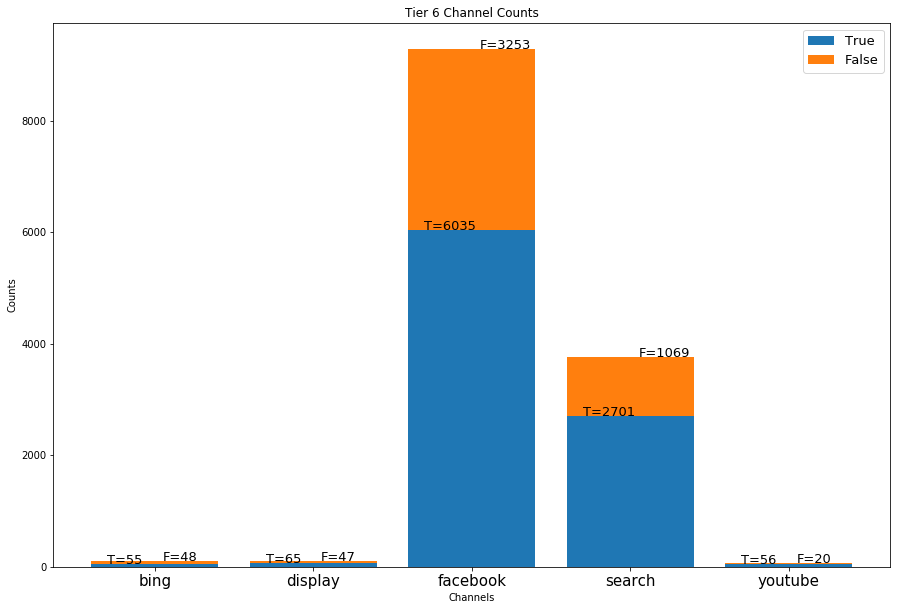

In [34]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 6
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [55, 65, 6035, 2701, 56]
sub_F = [48, 47, 3253, 1069, 20]
totals = [i+j for i,j in zip(sub_T, sub_F)]

ax.bar(channels, sub_T, label='True')
ax.bar(channels, sub_F, bottom=sub_T, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Counts')
ax.set_title(f'Tier {tier} Channel Counts')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T[i]+0.1, 
             s = f'T={sub_T[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = totals[i], 
             s = f'F={sub_F[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_counts.png')

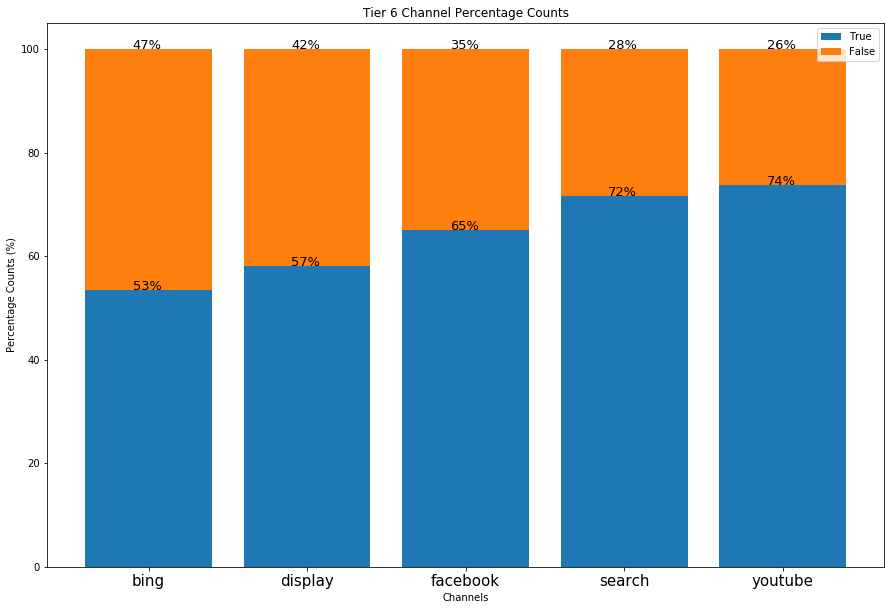

In [35]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 6
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [55, 65, 6035, 2701, 56]
sub_F = [48, 47, 3253, 1069, 20]
totals = [i+j for i,j in zip(sub_T, sub_F)]

sub_Tp = [i/j for i,j in zip(sub_T,totals)]
sub_Fp = [i/j for i,j in zip(sub_F,totals)]
totalp = [i+j for i,j in zip(sub_Tp, sub_Fp)]

ax.bar(channels, sub_Tp, label='True')
ax.bar(channels, sub_Fp, bottom=sub_Tp, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_yticklabels(np.arange(0,101,20), fontsize=10)
ax.set_xlabel('Channels')
ax.set_ylabel('Percentage Counts (%)')
ax.set_title(f'Tier {tier} Channel Percentage Counts')
ax.legend()

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = sub_Tp[i], 
             s = f'{int(round(sub_Tp[i],2)*100)}%', size = 13)
    
#false
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = totalp[i], 
             s = f'{int(round(sub_Fp[i],2)*100)}%', size = 13)


plt.show()
fig.savefig(f'plots/tier{tier}_countsp.png')

(False, 7.0, 'facebook'): 4133,
 (False, 7.0, 'search'): 1211,
 (False, 7.0, 'display'): 152,
 (False, 7.0, 'bing'): 79,
 (False, 7.0, 'youtube'): 46,
  (True, 7.0, 'facebook'): 5356,
 (True, 7.0, 'search'): 2862,
 (True, 7.0, 'display'): 189,
 (True, 7.0, 'youtube'): 159,
 (True, 7.0, 'bing'): 93,

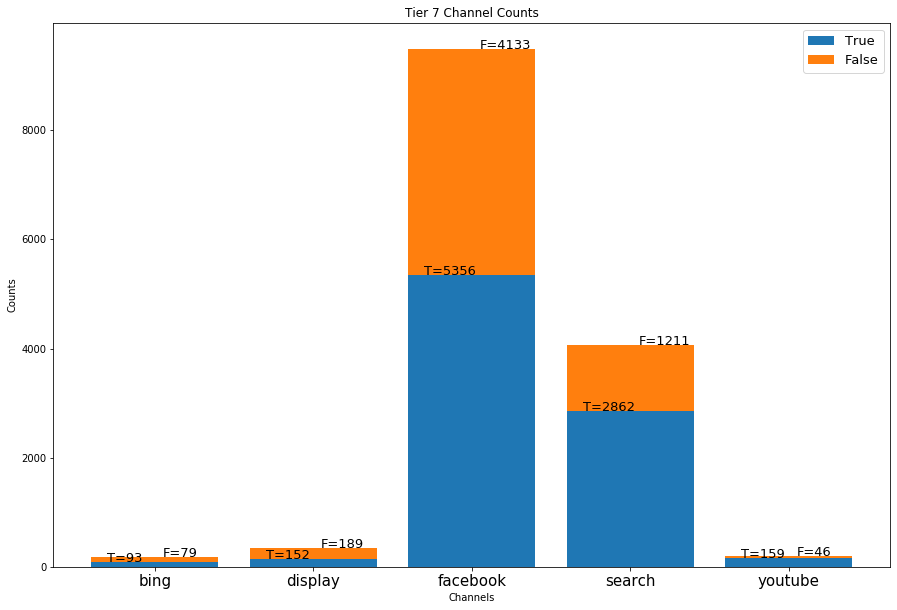

In [36]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 7
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [93, 152, 5356, 2862, 159]
sub_F = [79, 189, 4133, 1211, 46]
totals = [i+j for i,j in zip(sub_T, sub_F)]

ax.bar(channels, sub_T, label='True')
ax.bar(channels, sub_F, bottom=sub_T, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Counts')
ax.set_title(f'Tier {tier} Channel Counts')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T[i]+0.1, 
             s = f'T={sub_T[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = totals[i], 
             s = f'F={sub_F[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_counts.png')

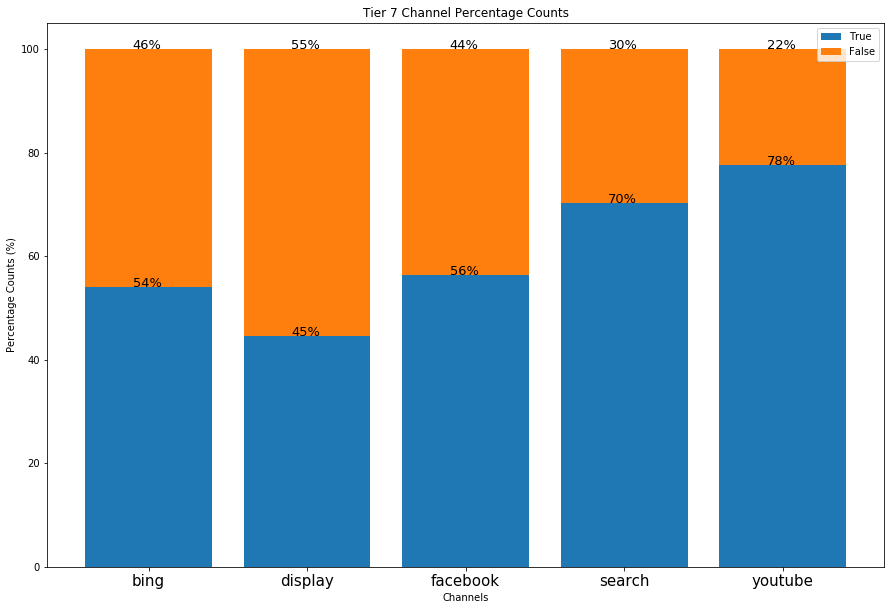

In [37]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 7
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [93, 152, 5356, 2862, 159]
sub_F = [79, 189, 4133, 1211, 46]
totals = [i+j for i,j in zip(sub_T, sub_F)]

sub_Tp = [i/j for i,j in zip(sub_T,totals)]
sub_Fp = [i/j for i,j in zip(sub_F,totals)]
totalp = [i+j for i,j in zip(sub_Tp, sub_Fp)]

ax.bar(channels, sub_Tp, label='True')
ax.bar(channels, sub_Fp, bottom=sub_Tp, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_yticklabels(np.arange(0,101,20), fontsize=10)
ax.set_xlabel('Channels')
ax.set_ylabel('Percentage Counts (%)')
ax.set_title(f'Tier {tier} Channel Percentage Counts')
ax.legend()

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = sub_Tp[i], 
             s = f'{int(round(sub_Tp[i],2)*100)}%', size = 13)
    
#false
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = totalp[i], 
             s = f'{int(round(sub_Fp[i],2)*100)}%', size = 13)


plt.show()
#fig.savefig(f'plots/tier{tier}_countsp.png')

(False, 8.0, 'facebook'): 4818,
 (False, 8.0, 'search'): 1341,
 (False, 8.0, 'display'): 210,
 (False, 8.0, 'bing'): 122,
 (False, 8.0, 'youtube'): 58,
 (True, 8.0, 'facebook'): 8177,
 (True, 8.0, 'search'): 2959,
 (True, 8.0, 'display'): 326,
 (True, 8.0, 'youtube'): 312,
 (True, 8.0, 'bing'): 181}

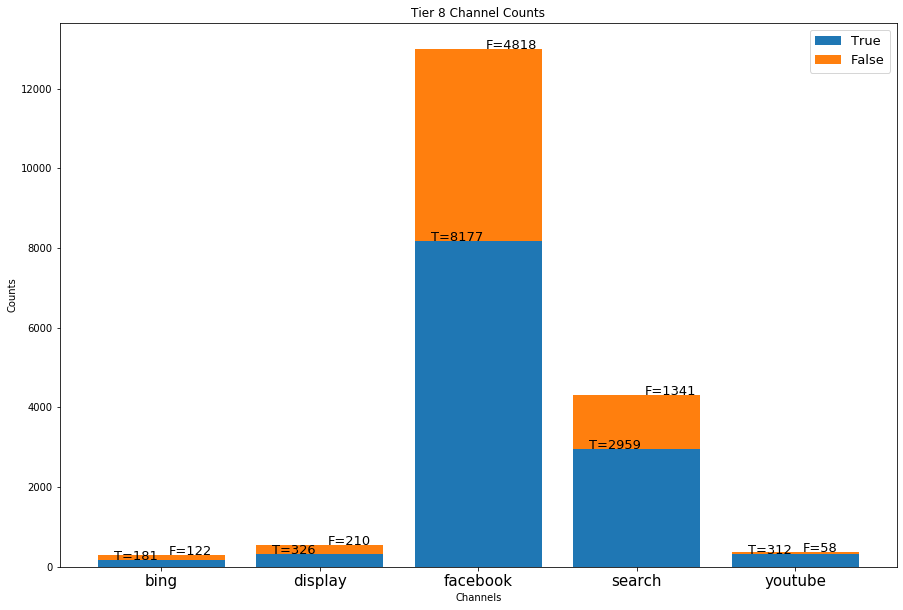

In [38]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 8
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [181, 326, 8177, 2959, 312]
sub_F = [122, 210, 4818, 1341, 58]
totals = [i+j for i,j in zip(sub_T, sub_F)]

ax.bar(channels, sub_T, label='True')
ax.bar(channels, sub_F, bottom=sub_T, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Counts')
ax.set_title(f'Tier {tier} Channel Counts')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T[i]+0.1, 
             s = f'T={sub_T[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = totals[i], 
             s = f'F={sub_F[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_counts.png')

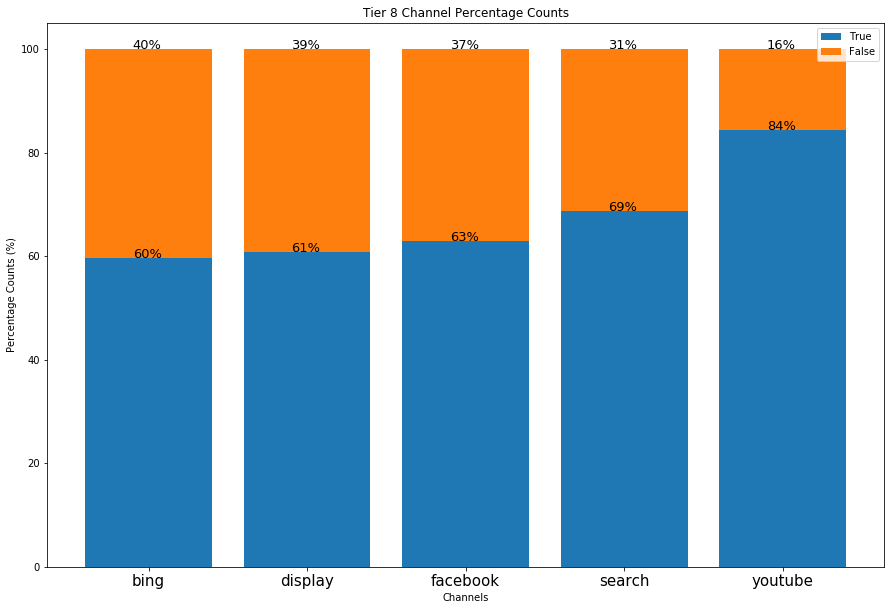

In [39]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 8
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [181, 326, 8177, 2959, 312]
sub_F = [122, 210, 4818, 1341, 58]
totals = [i+j for i,j in zip(sub_T, sub_F)]

sub_Tp = [i/j for i,j in zip(sub_T,totals)]
sub_Fp = [i/j for i,j in zip(sub_F,totals)]
totalp = [i+j for i,j in zip(sub_Tp, sub_Fp)]

ax.bar(channels, sub_Tp, label='True')
ax.bar(channels, sub_Fp, bottom=sub_Tp, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_yticklabels(np.arange(0,101,20), fontsize=10)
ax.set_xlabel('Channels')
ax.set_ylabel('Percentage Counts (%)')
ax.set_title(f'Tier {tier} Channel Percentage Counts')
ax.legend()

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = sub_Tp[i], 
             s = f'{int(round(sub_Tp[i],2)*100)}%', size = 13)
    
#false
for i in range(len(channels)):
    plt.text(x = width[i]-0.1,
             y = totalp[i], 
             s = f'{int(round(sub_Fp[i],2)*100)}%', size = 13)


plt.show()
#fig.savefig(f'plots/tier{tier}_countsp.png')

In [40]:
t1 = pd.json_normalize(ast.literal_eval(df1.spend[0]))
t1['tier']='tier1'
t1

,bing,display,facebook,search,youtube,tier
0,300,12,9000,13000,90,tier1


In [41]:
tiers = np.arange(1,9,1)
tiers_df = []
for t in tiers:
    tier = pd.json_normalize(ast.literal_eval(df1.spend[t-1]))
    tier['tier']=t
    tiers_df.append(tier)

tf = pd.concat(tiers_df)
tf.reset_index(drop=True, inplace=True)
tf

,bing,display,facebook,search,youtube,tier
0,300,12,9000,13000,90,1
1,400,13,10500,18500,100,2
2,900,19,11000,19000,130,3
3,1000,20,13000,24000,180,4
4,1100,29,14000,25000,550,5
5,1300,31,16000,38000,900,6
6,2100,94,17000,41000,2420,7
7,3700,148,23000,44000,4360,8


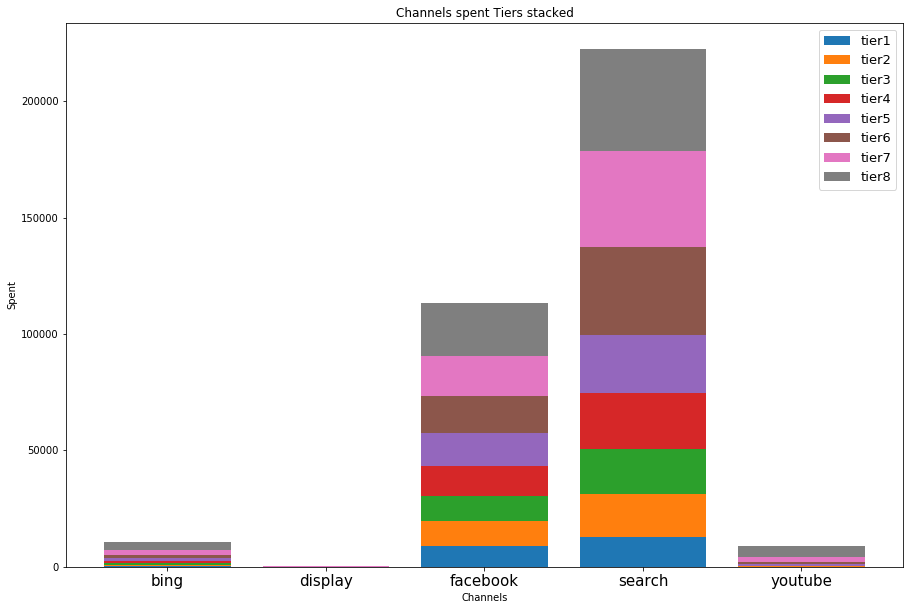

In [42]:
fig, ax = plt.subplots(figsize=(15,10))

tiers = np.arange(1,6,1)
channels = ['bing', 'display', 'facebook', 'search', 'youtube']

tier1 = list(tf.loc[0][:-1])
tier2 = list(tf.loc[1][:-1])
tier3 = list(tf.loc[2][:-1])
tier4 = list(tf.loc[3][:-1])
tier5 = list(tf.loc[4][:-1])
tier6 = list(tf.loc[5][:-1])
tier7 = list(tf.loc[6][:-1])
tier8 = list(tf.loc[7][:-1])
totals = [a+b+c+d+e+f+g+h for a,b,c,d,e,f,g,h 
          in zip(tier1, tier2, tier3, tier4, tier5, tier6, tier7, tier8)]

ax.bar(channels, tier1, label='tier1')
ax.bar(channels, tier2, bottom=tier1, label='tier2')
ax.bar(channels, tier3, bottom=[a+b for a,b in zip(tier1,tier2)], label='tier3')
ax.bar(channels, tier4, bottom=[a+b+c for a,b,c in zip(tier1, tier2, tier3)], label='tier4')
ax.bar(channels, tier5, bottom=[a+b+c+d for a,b,c,d in 
                             zip(tier1, tier2, tier3, tier4)], label='tier5')
ax.bar(channels, tier6, bottom=[a+b+c+d+e for a,b,c,d,e in 
                             zip(tier1, tier2, tier3, tier4, tier5)], label='tier6')
ax.bar(channels, tier7, bottom=[a+b+c+d+e+f for a,b,c,d,e,f in 
                             zip(tier1, tier2, tier3, tier4, tier5, tier6)], label='tier7')
ax.bar(channels, tier8, bottom=[a+b+c+d+e+f+g for a,b,c,d,e,f,g in 
                             zip(tier1, tier2, tier3, tier4, tier5, tier6, tier7)], label='tier8')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Channels spent Tiers stacked')
ax.legend(fontsize=13)

plt.show()
#fig.savefig(f'plots/tier_channel_spent.png')

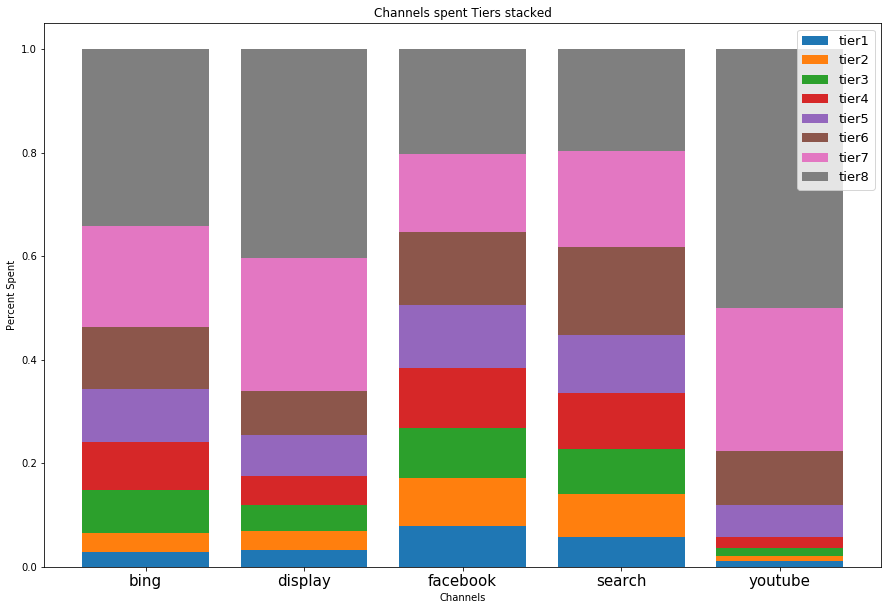

In [43]:
fig, ax = plt.subplots(figsize=(15,10))

tiers = np.arange(1,6,1)
channels = ['bing', 'display', 'facebook', 'search', 'youtube']

tier1 = list(tf.loc[0][:-1])
tier2 = list(tf.loc[1][:-1])
tier3 = list(tf.loc[2][:-1])
tier4 = list(tf.loc[3][:-1])
tier5 = list(tf.loc[4][:-1])
tier6 = list(tf.loc[5][:-1])
tier7 = list(tf.loc[6][:-1])
tier8 = list(tf.loc[7][:-1])
totals = [a+b+c+d+e+f+g+h for a,b,c,d,e,f,g,h 
          in zip(tier1, tier2, tier3, tier4, tier5, tier6, tier7, tier8)]

tier1p = [i/j for i,j in zip(tier1,totals)]
tier2p = [i/j for i,j in zip(tier2,totals)]
tier3p = [i/j for i,j in zip(tier3,totals)]
tier4p = [i/j for i,j in zip(tier4,totals)]
tier5p = [i/j for i,j in zip(tier5,totals)]
tier6p = [i/j for i,j in zip(tier6,totals)]
tier7p = [i/j for i,j in zip(tier7,totals)]
tier8p = [i/j for i,j in zip(tier8,totals)]
totalp = [a+b+c+d+e+f+g+h for a,b,c,d,e,f,g,h
          in zip(tier1p, tier2p, tier3p, tier4p, tier5p, tier6p, tier7p, tier8p)]


ax.bar(channels, tier1p, label='tier1')
ax.bar(channels, tier2p, bottom=tier1p, label='tier2')
ax.bar(channels, tier3p, bottom=[a+b for a,b in zip(tier1p,tier2p)], label='tier3')
ax.bar(channels, tier4p, bottom=[a+b+c for a,b,c in zip(tier1p, tier2p, tier3p)], label='tier4')
ax.bar(channels, tier5p, bottom=[a+b+c+d for a,b,c,d in 
                             zip(tier1p, tier2p, tier3p, tier4p)], label='tier5')
ax.bar(channels, tier6p, bottom=[a+b+c+d+e for a,b,c,d,e in 
                             zip(tier1p, tier2p, tier3p, tier4p, tier5p)], label='tier6')
ax.bar(channels, tier7p, bottom=[a+b+c+d+e+f for a,b,c,d,e,f in 
                             zip(tier1p, tier2p, tier3p, tier4p, tier5p, tier6p)], label='tier7')
ax.bar(channels, tier8p, bottom=[a+b+c+d+e+f+g for a,b,c,d,e,f,g in 
                             zip(tier1p, tier2p, tier3p, tier4p, tier5p, tier6p, tier7p)], label='tier8')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Percent Spent')
ax.set_title(f'Channels spent Tiers stacked')
ax.legend(fontsize=13)

plt.show()
#fig.savefig(f'plots/tier_channel_spent_p.png')

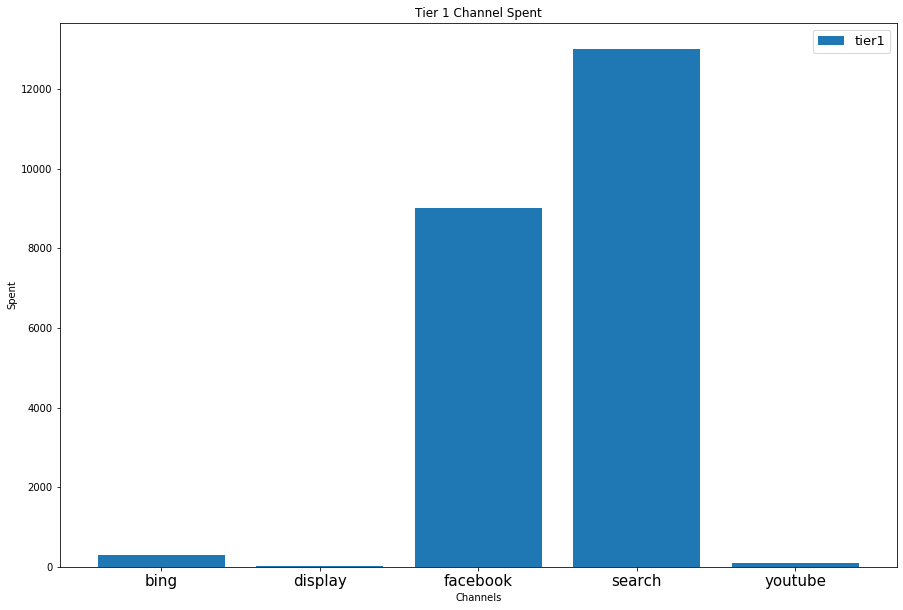

In [44]:
fig, ax = plt.subplots(figsize=(15,10))

tiers = np.arange(1,6,1)
channels = ['bing', 'display', 'facebook', 'search', 'youtube']

tier1 = list(tf.loc[0][:-1])

ax.bar(channels, tier1, label='tier1')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier 1 Channel Spent')
ax.legend(fontsize=13)

plt.show()
#fig.savefig(f'plots/tier_channel_spent.png')

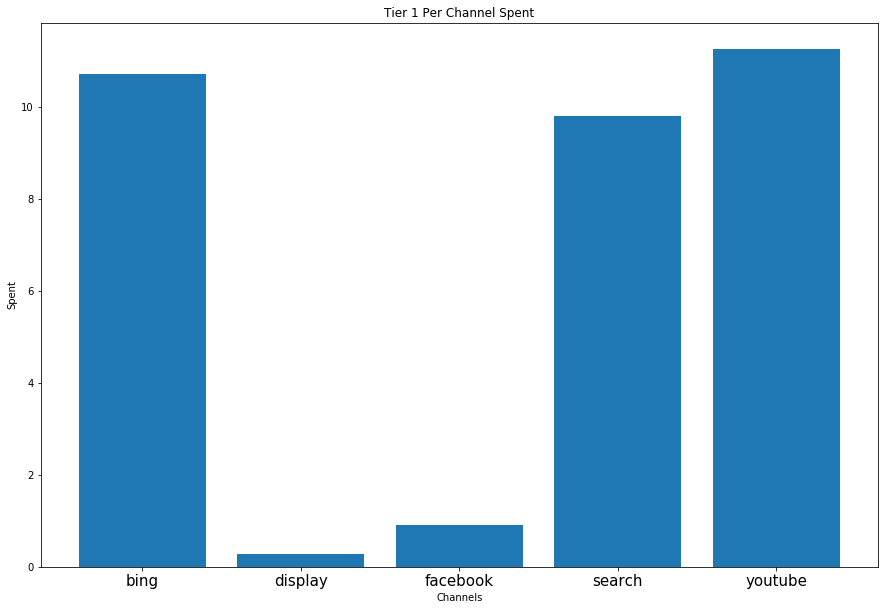

In [45]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 1
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [13, 4, 927, 256, 0]
sub_F = [15, 40, 9084, 1072, 8]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tier1 = list(tf.loc[0][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
per_channel = [i/j for i,j in zip(tier1, totals)]

ax.bar(channels, per_channel)

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')

plt.show()
#fig.savefig(f'plots/tier{tier}_perChannelSpent_basic.png')

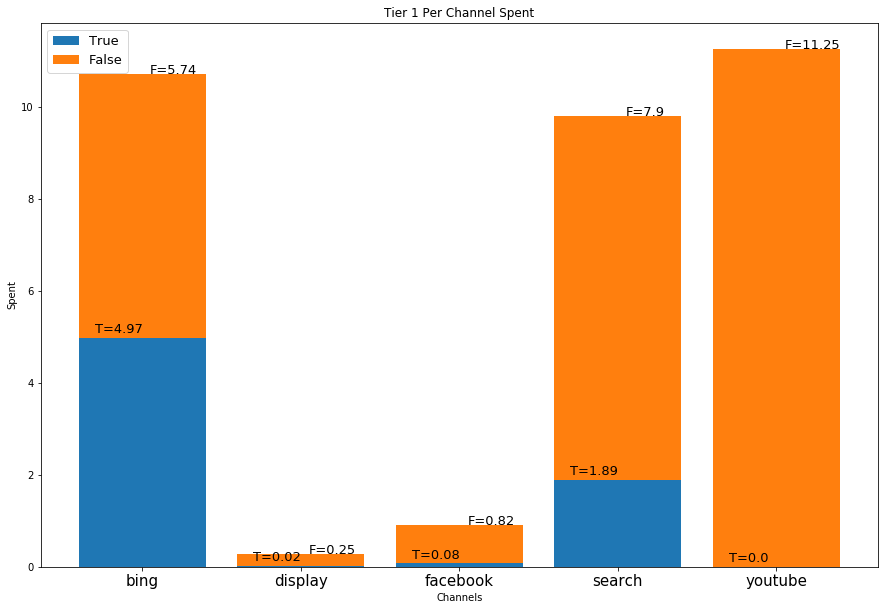

In [46]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 1
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [13, 4, 927, 256, 0]
sub_F = [15, 40, 9084, 1072, 8]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tier1 = list(tf.loc[0][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_T, totals, tier1)]
sub_F_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_F, totals, tier1)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_perChannelSpent.png')

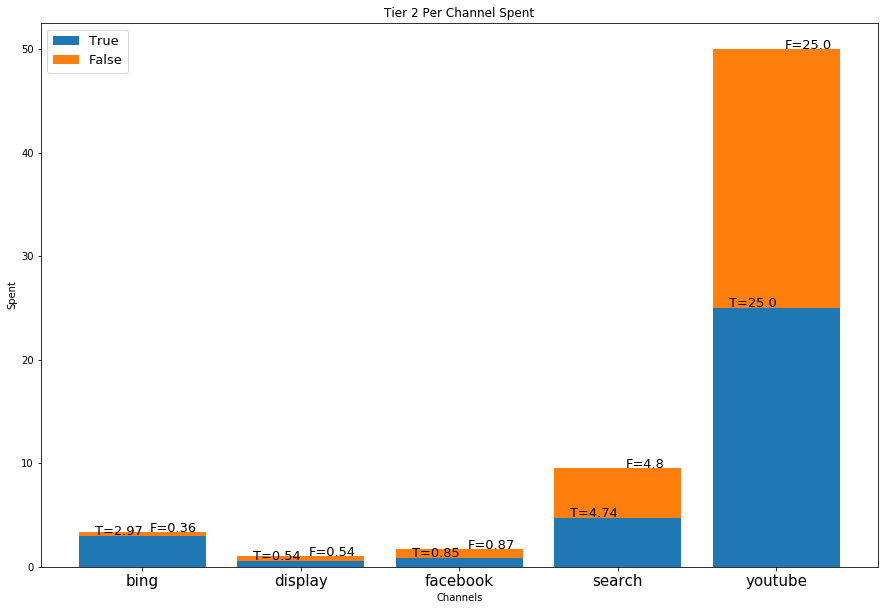

In [47]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 2
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [107, 6, 3032, 963, 1]
sub_F = [13, 6, 3097, 976, 1]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_perChannelSpent.png')

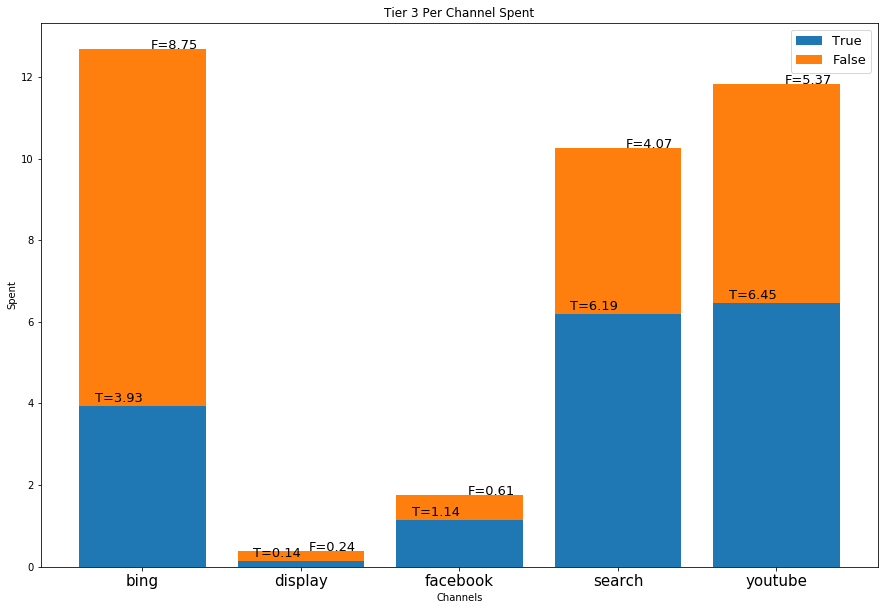

In [48]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 3
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [22, 19, 4103, 1118, 6]
sub_F = [49, 31, 2186, 734, 5]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_perChannelSpent.png')

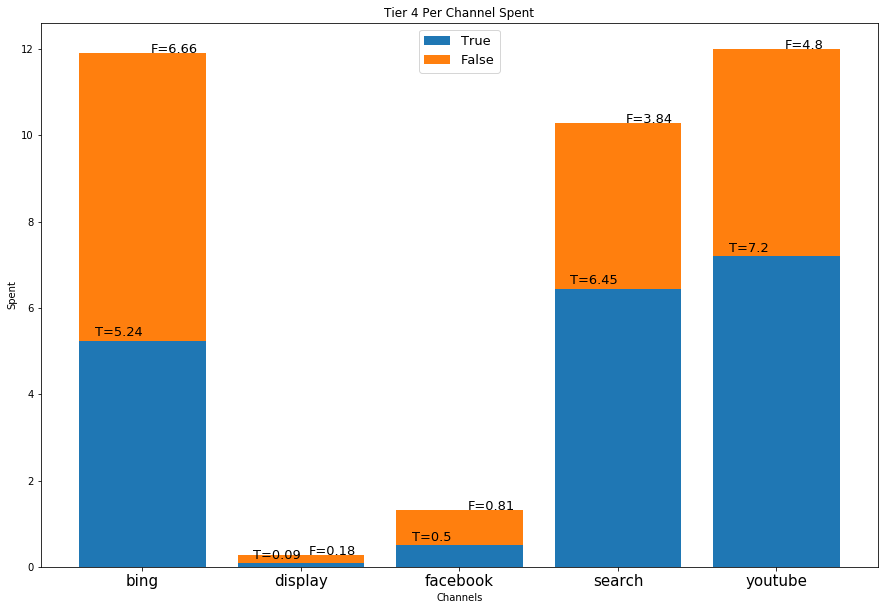

In [49]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 4
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [37, 25, 3767, 1463, 9]
sub_F = [47, 49, 6088, 870, 6]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_perChannelSpent.png')

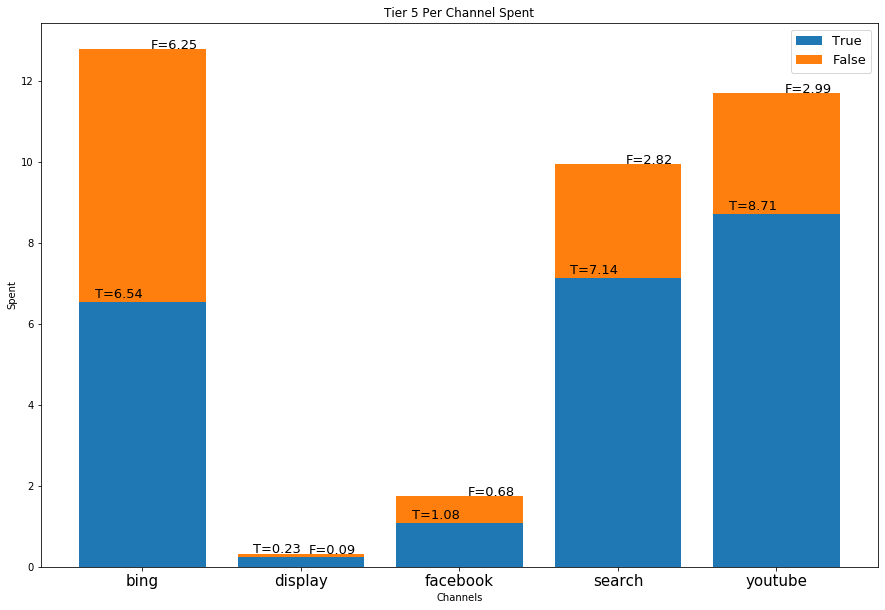

In [50]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 5
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [44, 64, 4902, 1800, 35]
sub_F = [42, 26, 3086, 710, 12]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_perChannelSpent.png')

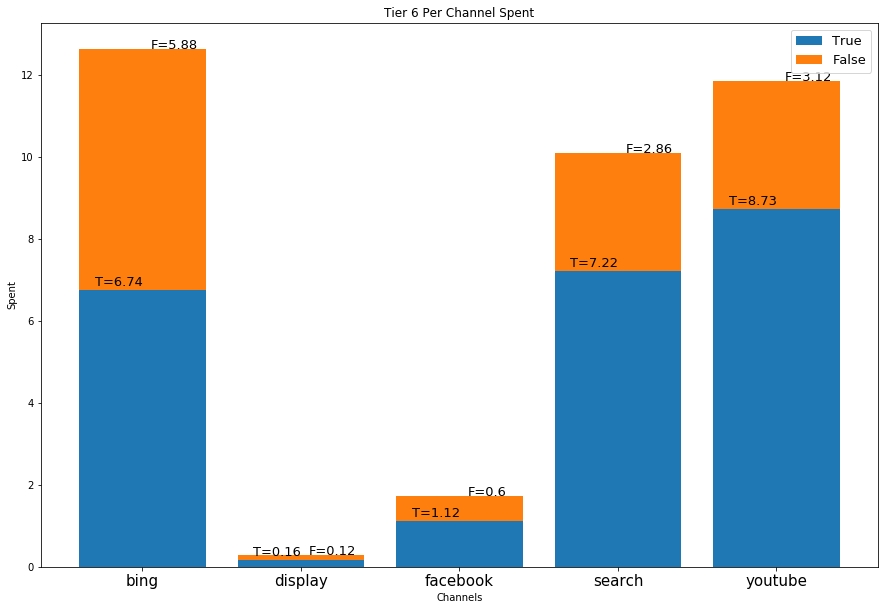

In [51]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 6
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [55, 65, 6035, 2701, 56]
sub_F = [48, 47, 3253, 1069, 20]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_perChannelSpent.png')

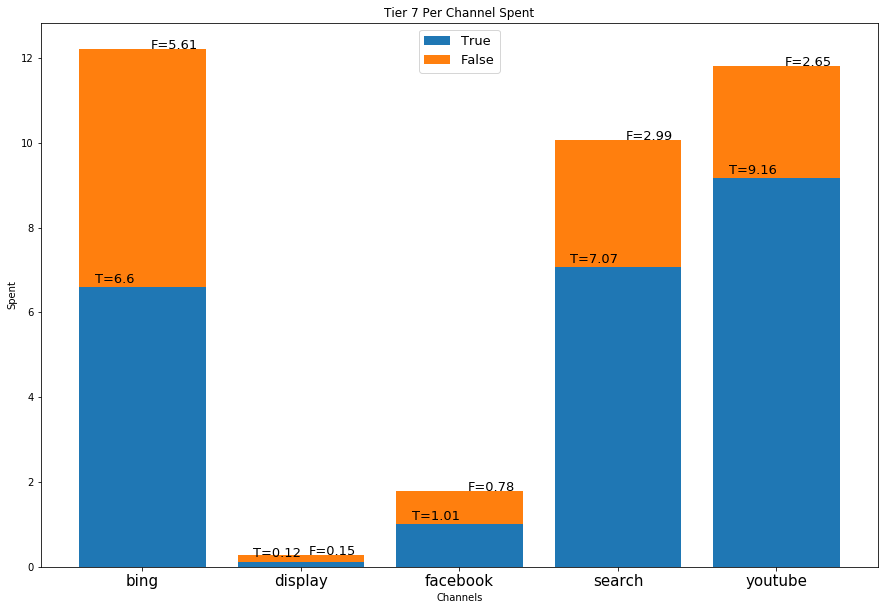

In [52]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 7
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [93, 152, 5356, 2862, 159]
sub_F = [79, 189, 4133, 1211, 46]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_perChannelSpent.png')

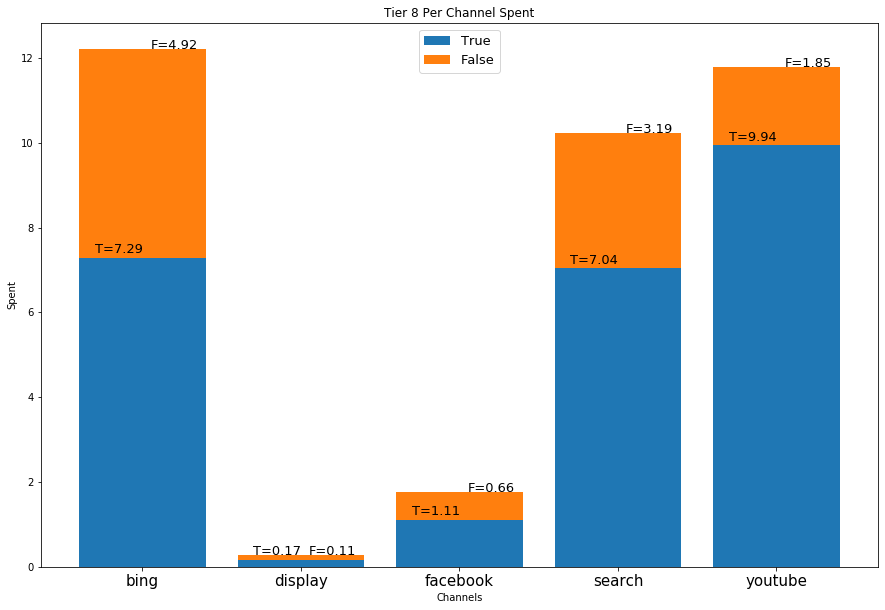

In [53]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 8
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [181, 326, 8177, 2959, 312]
sub_F = [122, 210, 4818, 1341, 58]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/j)*(i/j),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_perChannelSpent.png')

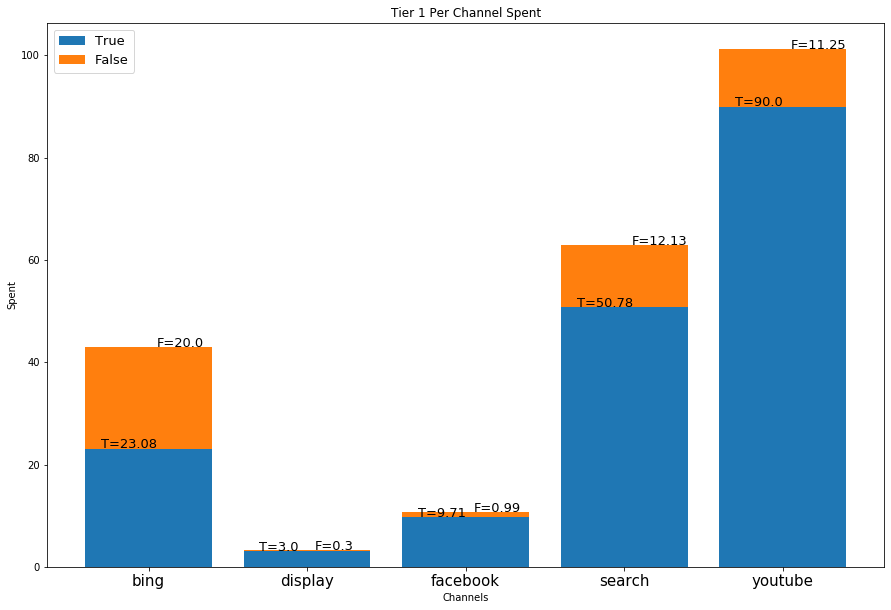

In [54]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 1
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
# sub_T = [13, 4, 927, 256, 0]
sub_T = [13, 4, 927, 256, 1]
sub_F = [15, 40, 9084, 1072, 8]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/i),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/i),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_CAC.png')

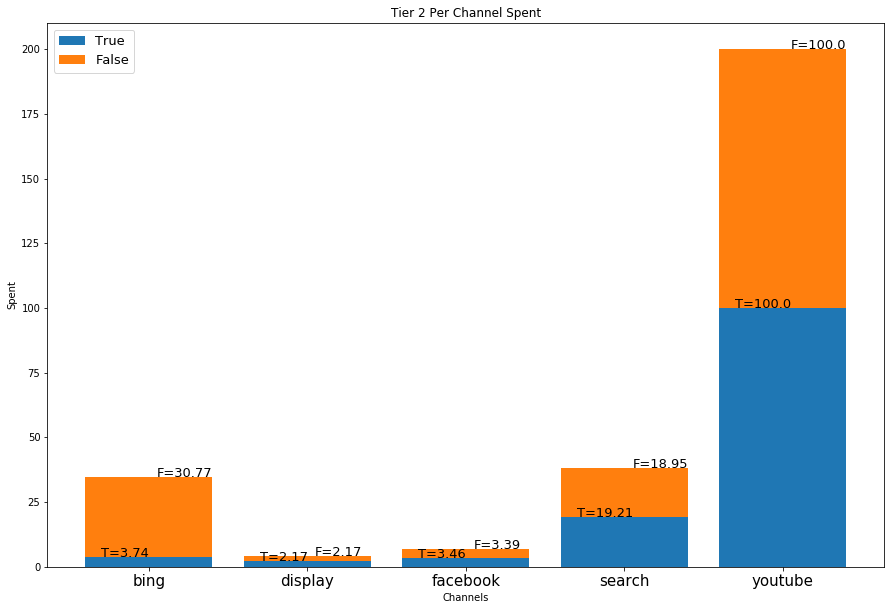

In [55]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 2
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [107, 6, 3032, 963, 1]
sub_F = [13, 6, 3097, 976, 1]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/i),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/i),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_CAC.png')

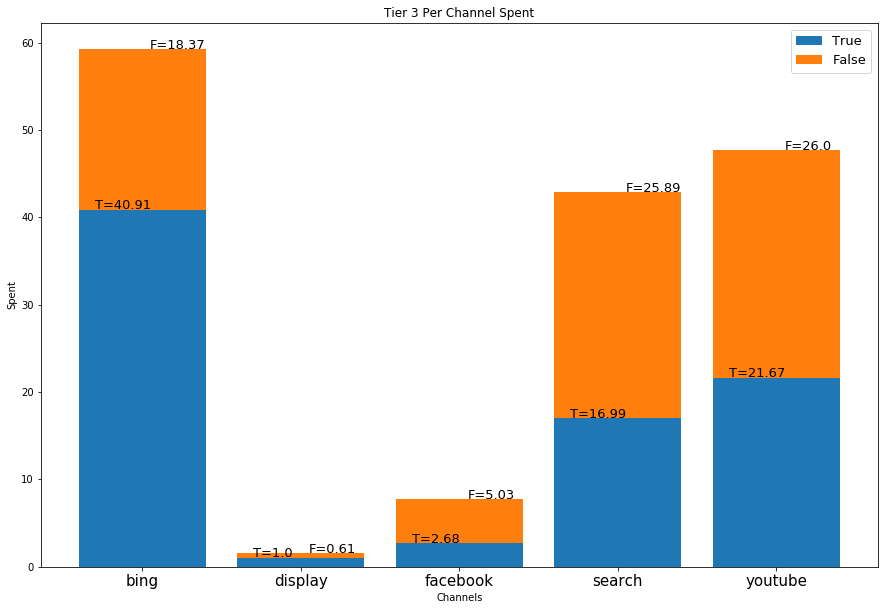

In [56]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 3
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [22, 19, 4103, 1118, 6]
sub_F = [49, 31, 2186, 734, 5]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/i),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/i),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_CAC.png')

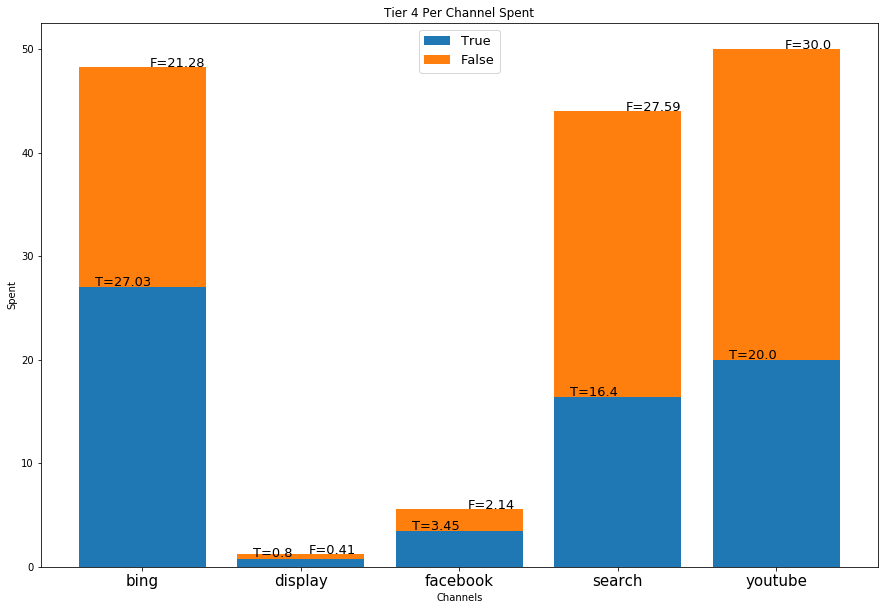

In [57]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 4
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [37, 25, 3767, 1463, 9]
sub_F = [47, 49, 6088, 870, 6]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/i),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/i),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_CAC.png')

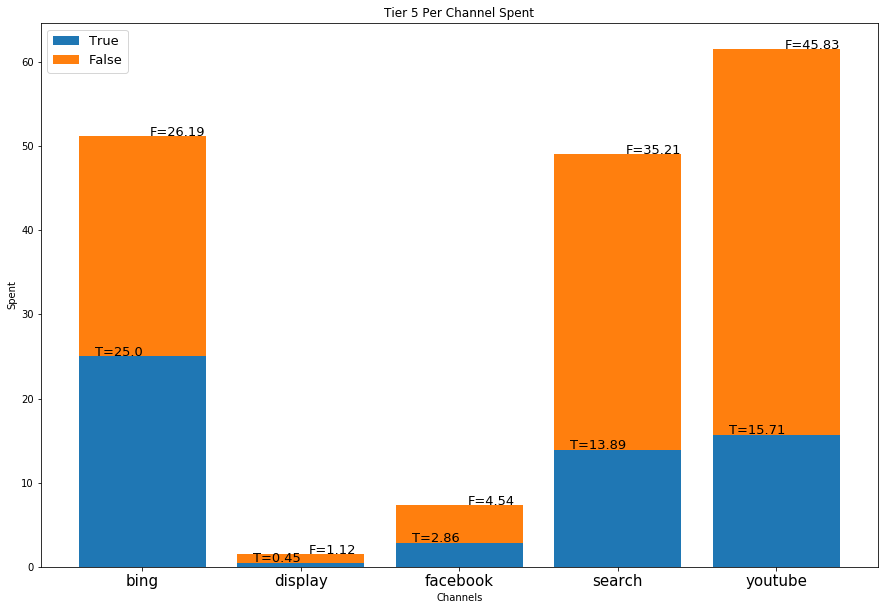

In [58]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 5
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [44, 64, 4902, 1800, 35]
sub_F = [42, 26, 3086, 710, 12]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/i),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/i),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_CAC.png')

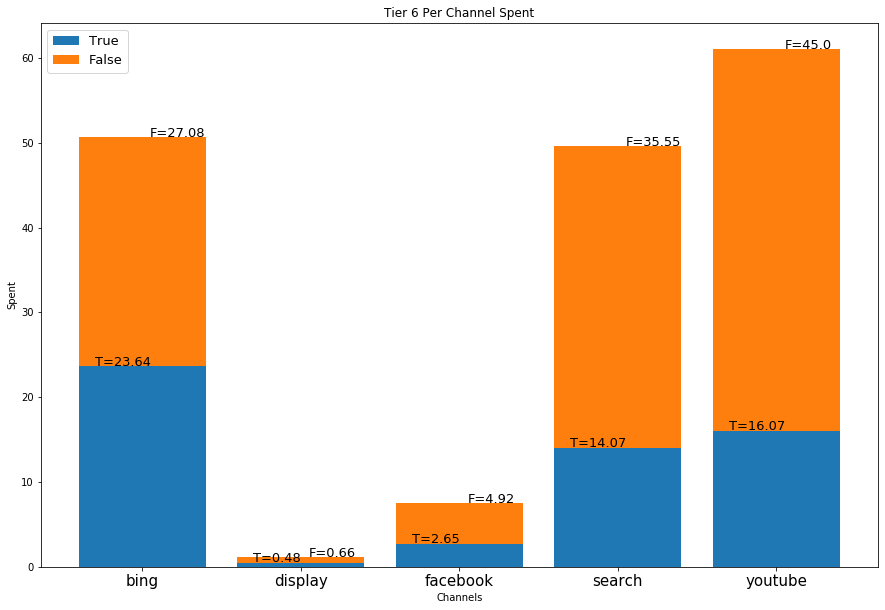

In [59]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 6
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [55, 65, 6035, 2701, 56]
sub_F = [48, 47, 3253, 1069, 20]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/i),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/i),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_CAC.png')

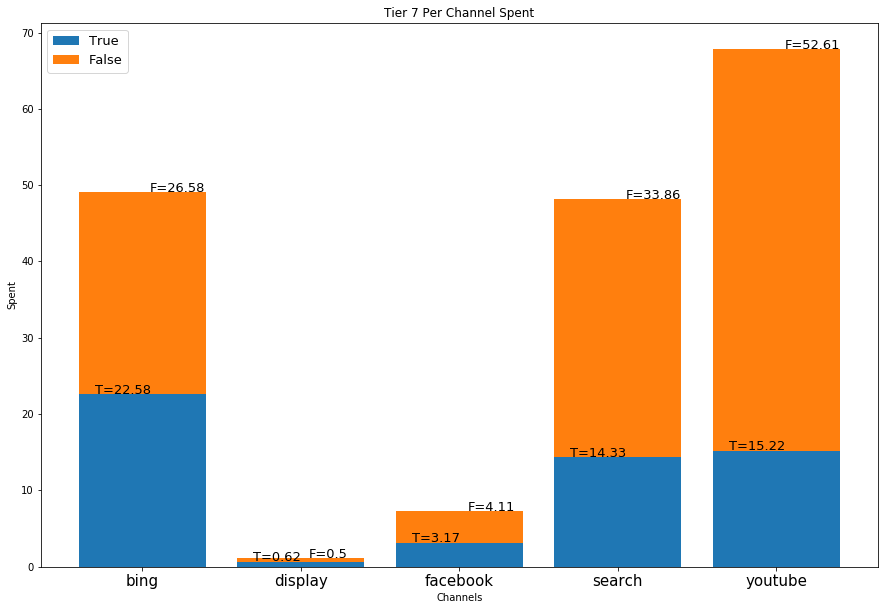

In [60]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 7
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [93, 152, 5356, 2862, 159]
sub_F = [79, 189, 4133, 1211, 46]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/i),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/i),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_CAC.png')

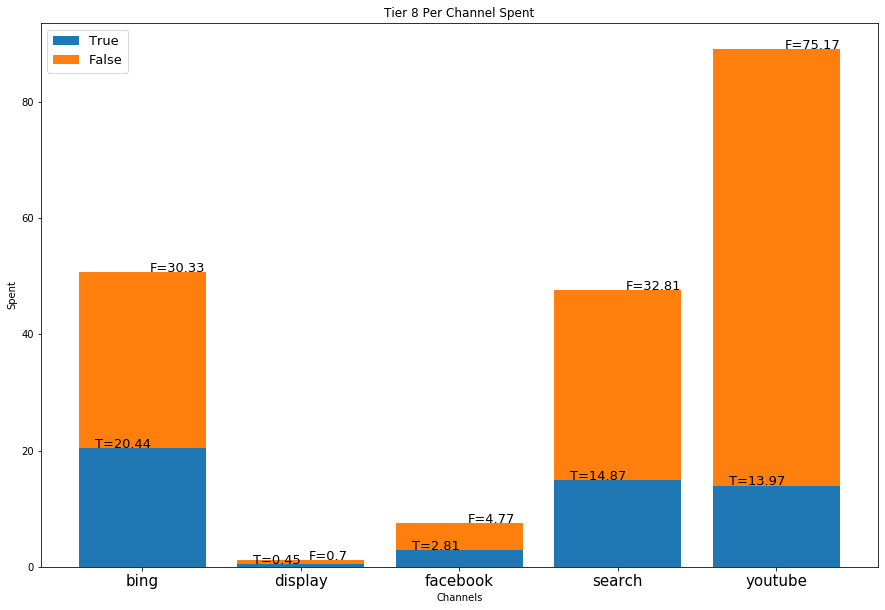

In [61]:
fig, ax = plt.subplots(figsize=(15,10))

tier = 8
channels = ['bing', 'display', 'facebook', 'search', 'youtube']
sub_T = [181, 326, 8177, 2959, 312]
sub_F = [122, 210, 4818, 1341, 58]
totals = [i+j for i,j in zip(sub_T, sub_F)]
tierf = list(tf.loc[tier-1][:-1])
#sub_T_spent = [i/j for i,j in zip(sub_T, tier1)]
#sub_F_spent = [i/j for i,j in zip(sub_F, tier1)]
#sub_T_spent = [round(k/j*i,2) for i,j,k in zip(sub_T, totals, tier1)]
#sub_F_spent = [round(k/j*i,2) for i,j,k in zip(sub_F, totals, tier1)]
#per_channel = [i/j for i,j in zip(tier1, totals)]
sub_T_spent = [round((k/i),2) for i,j,k in zip(sub_T, totals, tierf)]
sub_F_spent = [round((k/i),2) for i,j,k in zip(sub_F, totals, tierf)]
total_spent = [i+j for i,j in zip(sub_T_spent, sub_F_spent)]

ax.bar(channels, sub_T_spent, label='True')
ax.bar(channels, sub_F_spent, bottom=sub_T_spent, label='False')

ax.set_xticklabels(channels, fontsize=15)
ax.set_xlabel('Channels')
ax.set_ylabel('Spent')
ax.set_title(f'Tier {tier} Per Channel Spent')
ax.legend(fontsize=13)

# Text on the top of each barplot
width = np.arange(0,len(channels)+1,1)
#true
for i in range(len(channels)):
    plt.text(x = width[i]-0.3,
             y = sub_T_spent[i]+0.1, 
             s = f'T={sub_T_spent[i]}', size = 13)
#false
for i in range(len(channels)):
    plt.text(x = width[i]+0.05,
             y = total_spent[i], 
             s = f'F={sub_F_spent[i]}', size = 13)

plt.show()
#fig.savefig(f'plots/tier{tier}_CAC.png')

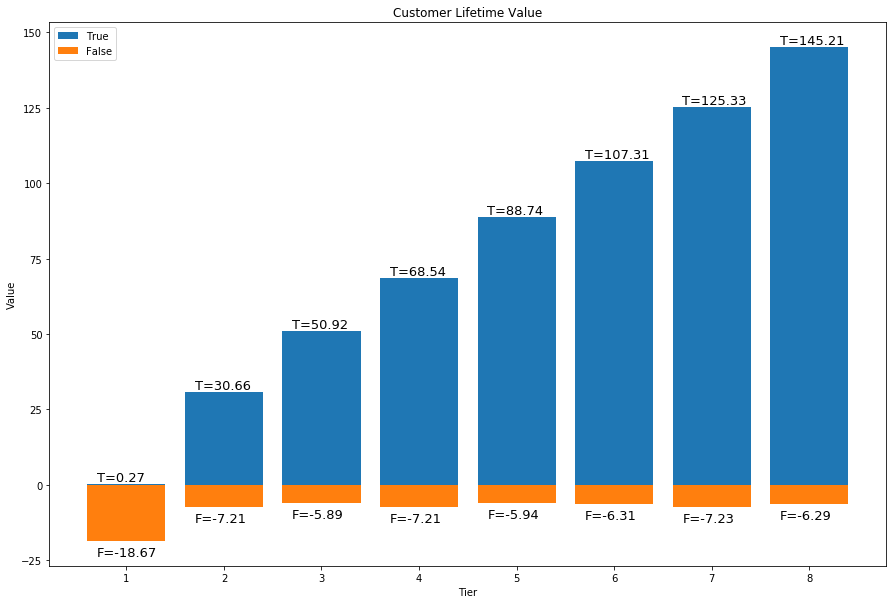

In [62]:
fig, ax = plt.subplots(figsize=(15,10))

tier = np.arange(1,9,1)

# number of customers
sub_T = list(counts[counts['current_sub_TF']==True]['attribution_technical'])
sub_F = list(counts[counts['current_sub_TF']==False]['attribution_technical'])
# revenue = monthly sub * 4 months per tier * num of tier
sub_T_rev = [round(4.7343*i*4*t,2) for i,t in zip(sub_T, tier)]
sub_F_rev = [round(0*i,2) for i in sub_F]
# costs
tier1 = list(tf.loc[0][:-1])
tier2 = list(tf.loc[1][:-1])
tier3 = list(tf.loc[2][:-1])
tier4 = list(tf.loc[3][:-1])
tier5 = list(tf.loc[4][:-1])
tier6 = list(tf.loc[5][:-1])
tier7 = list(tf.loc[6][:-1])
tier8 = list(tf.loc[7][:-1])
tiers = [sum(tier1), sum(tier2), sum(tier3), sum(tier4), sum(tier5), sum(tier6), sum(tier7), sum(tier8)]    
# CLV = (revenue-cost) / number of customers
sub_T_CLV = [round((i-j)/k,2) for i,j,k in zip(sub_T_rev, tiers, sub_T)]
sub_F_CLV = [round((i-j)/k,2) for i,j,k in zip(sub_F_rev, tiers, sub_T)]

ax.bar(tier, sub_T_CLV, label='True')
ax.bar(tier, sub_F_CLV, label='False')

ax.set_xlabel('Tier')
ax.set_ylabel('Value')
ax.set_title('Customer Lifetime Value')
ax.legend()

# Text on the top of each barplot
width = np.arange(1,len(tier)+1,1)
#true
for i in range(len(tier)):
    plt.text(x = width[i]-0.3,
             y = sub_T_CLV[i]+1, 
             s = f'T={sub_T_CLV[i]}', size = 13)
#false
for i in range(len(tier)):
    plt.text(x = width[i]-0.3,
             y = sub_F_CLV[i]-5, 
             s = f'F={sub_F_CLV[i]}', size = 13)

plt.show()
#fig.savefig('plots/sub_tiers_CLV.png')

### Thoughts

Combining attribution/allocation and customer segmentation

what are the age group that were by which channel attributed?

how do we use different channels to target which groups?